# 2.2 パーセプトロンの学習アルゴリズムをPythonで実装する

In [2]:
import numpy as np
class Perceptron(object):
    """パーセプトロンの分類器
    
    パラメータ
    --------------
    eta: float
        学習率　（0.0より大きくて1.0以下の値）
    n_iter : int
        トレーニングデータのトレーニング回数
    random_state: int
        重みを初期化するための乱数シード
        
    属性(初期化以外のメソッドで発生する値)
    -------------
    w_ : 1次元配列
        適合後の重み
    error_ :
        各エポックでの誤分類の数
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """トレーニングデータに適応させる
        
        パラメータ
        -------------
        X: {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数，n_featuresは特徴量の個数
        y: 配列のようなデータ構造，shape = [n_samples]
            目的関数
        
        戻り値
        ----------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y):
                # 重みの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                #  重みの更新
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            #反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

self.w_[0]がバイアスユニットを表している<br>
だから重みは(m+1)次元ある<br>
rgenという乱数生成器を生成，ここでは標準偏差１の正規分布を生成している
もし重みが０で生成されてしまうと，学習率は重みベクトルの向きではなく大きさのみに作用してしまう

In [3]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

# 2.3 Irisデータセットでのパーセプトロンモデルのトレーニング
がく片の長さと花びらの長さの２つの特徴量のみでトレーニングしてみる

In [4]:
import pandas as pd
df = pd.read_csv('./iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


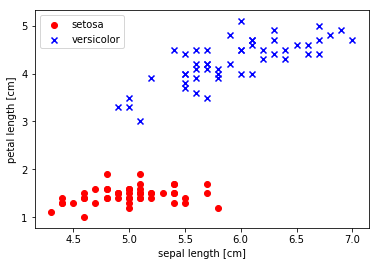

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを-1, Iris-virginicaを１に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の１，３列目の抽出
X = df.iloc[0:100, [0,2]].values
# 品種setosaのプロット(赤の○)
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット(青の☓)
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

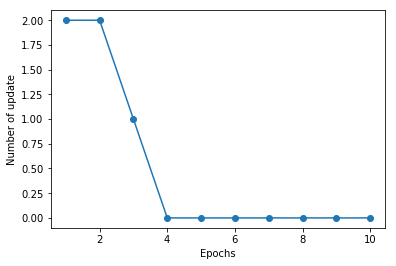

In [6]:
# パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
#　軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')
# 図の表示
plt.show()

４回目のエポックで境界を決定できていることがわかる．
決定境界を可視化する関数の実装をする

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

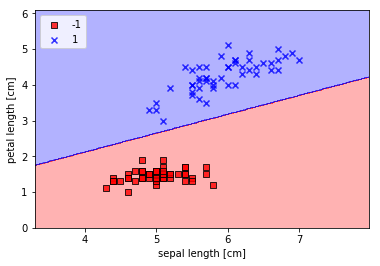

In [8]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.show()

# 2.4 ADALINEと学習の収束
ADALINE(ADAptive LInear NEuron)はパーセプトロンのような単位ステップ関数ではなく，線形活性化関数に基づいて重みが更新される．<br>
連続値なので，コスト関数が微分可能であるので，勾配に応じた重み更新ができる．
# 2.5.1ADALINEをPythonで実装する
パーセプトロンの学習規則とADALINEはよく似ているため，fitメソッドの置き換えることができる．

In [9]:
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron 分類器
    
    パラメータ
    --------------
    eta: float
        学習率　（0.0より大きくて1.0以下の値）
    n_iter : int
        トレーニングデータのトレーニング回数
    random_state: int
        重みを初期化するための乱数シード
        
    属性(初期化以外のメソッドで発生する値)
    -------------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックでの誤差平方和のコスト関数
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """トレーニングデータに適応させる
        
        パラメータ
        -------------
        X: {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数，n_featuresは特徴量の個数
        y: 配列のようなデータ構造，shape = [n_samples]
            目的関数
        
        戻り値
        ----------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            net_input = self.net_input(X)
            output = self.activation(net_input)
            # 誤差の計算
            errors = (y - output)
            # 重みw1~の更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            #  重みw0の更新
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算
            cost = (errors**2).sum() / 2.0
            #コストの格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return X
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

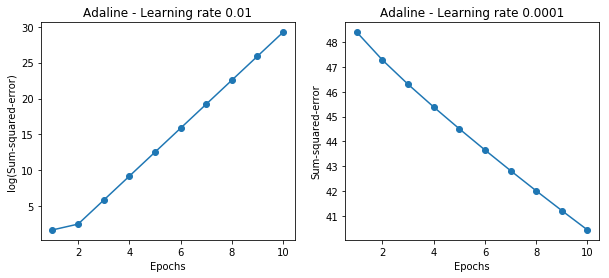

In [10]:
# 描画領域を１行２列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

# 2.5.2 特徴量のスケーリングを通じて勾配降下法を改善する
<strong>標準化</strong>というスケーリング手法を用いる．標準化は各特徴量の平均をずらして中心が０になるようにし，各特徴量の標準偏差を１にする．NumPyのmeanメソッドとstdメソッドを利用すれば，標準化を実現するのは簡単である．

In [11]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

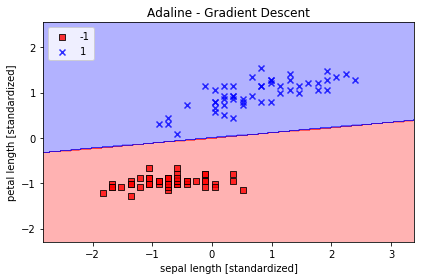

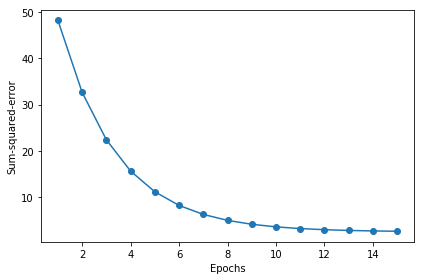

In [12]:
#  勾配降下法によるADALINEの学習(標準化後，学習率 eta = 0.01)
ada = AdalineGD(n_iter=15, eta=0.01)
# モデルの結合
ada.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

# 2.6　大規模な機械学習と確率的勾配降下法
前節ではトレーニングデータセット全体から計算されたコスト勾配とは逆方向に進む事により，コスト関数を最勝する方法について説明した．このアプローチは<strong>バッチ勾配降下法</strong>という．しかし，大量のトレーニングデータがあると，全てのデータを評価するととてつもない計算コストがかかってしまう．<br>
そこで代わりによく用いられるのが<strong>確率的勾配法</strong>である．トレーニングサンプルごとに段階的に重みを更新する．確率的勾配法を使って正確な結果を得るためには，トレーニングデータをランダムな順序に並び替える事が必要となる．<br>
また，確率的勾配法のメリットの一つは<strong>オンライン学習</strong>に利用できる．新しいトレーニングデータが届くたびにその場でモデルがトレーニングされる．

In [20]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron 分類器
    
    パラメータ
    --------------
    eta: float
        学習率　（0.0より大きくて1.0以下の値）
    n_iter : int
        トレーニングデータのトレーニング回数
    shuffle: bool (default: True)
        Trueの場合は，循環を回避するためにエポックごとにトレーニングデータをシャッフル
    random_state: int
        重みを初期化するための乱数シード
        
    属性(初期化以外のメソッドで発生する値)
    -------------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックでの誤差平方和のコスト関数
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        # 重みの初期化フラグはFalseに設定
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """トレーニングデータに適応させる
        
        パラメータ
        -------------
        X: {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数，n_featuresは特徴量の個数
        y: 配列のようなデータ構造，shape = [n_samples]
            目的関数
        
        戻り値
        ----------
        self: object
        
        """
        
        # 重みベクトルの生成
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            # 各サンプルのコストを格納するリストの生成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            # 平均コストを格納
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """重みを最初期化することなくトレーニングデータに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi. target in zip(X, y):
                self._update_weights(X, y)
        else: 
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを小さな乱数に初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        # 活性化関数の出力の計算
        output = self.activation(self.net_input(xi))
        # 誤差の計算
        error = (target - output)
        #重みの更新w1~
        self.w_[1:] += self.eta * xi.dot(error)
        #重みの更新w0
        self.w_[0] += self.eta * error
        # コストの計算
        cost = 0.5 * error**2
        return cost
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return X
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1) 

_shuffle のpermutationはランダムな順序の順列を作る関数．ここでは同じ順番の並び替え方で，Xとyを並び替えて戻り値としている．

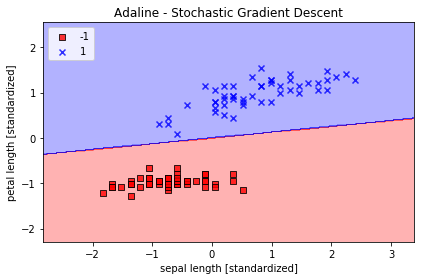

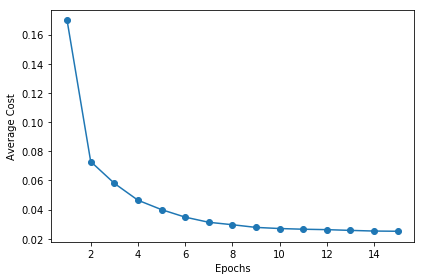

In [22]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

このように平均コストがすぐに減少していることがわかる．もし，オンライン学習で更新したいならpartial_fitメソッドを呼び出すだけで良い．

In [23]:
ada.partial_fit(X_std[0, :], y[0])